In [1]:
# Import libraries and packages.

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm 

# About Financial Fraud Dataset

* Step: A unit of time that represents hours in the dataset. Think of this as the timestamp of the transaction (e.g. hour 1, hour 2, … hour 534, …) 

* Type: The type of transaction 

* Amount: The amount of money transferred 

* NameOrig: The origin account name

* OldBalanceOrg: The origin accounts balance before the transaction 

* NewBalanceOrg: The origin accounts balance after the transaction 

* NameDest: The destination account name 

* OldbalanceDest: The destination accounts balance before the transaction 

* NewbalanceDest: The destination accounts balance after the transaction 

* IsFlaggedFraud: A “naive” model that simply flags a transaction as fraudulent if it is greater than 200,000 (note that this currency is not USD) 

* IsFraud: Was this simulated transaction actually fraudulent? In this case, we consider “fraud” to be a malicious transaction that aimed to transfer funds out of a victim’s bank account before the account owner could secure their information. 




In [2]:
# Read FinancalFraud csv file into DataFrame
df=pd.read_csv("/Users/sa19/Desktop/Phase2TLAB1/PS_20174392719_1491204439457_log copy.csv")

In [3]:
#print the first five rows of the dataset
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
df.shape

(6362620, 11)

In [7]:
df_type = df.value_counts("type")
df_type.to_frame()

,count
type,
CASH_OUT,2237500
PAYMENT,2151495
CASH_IN,1399284
TRANSFER,532909
DEBIT,41432


# Univariate analysis

<Axes: title={'center': 'Transaction type'}, xlabel='type'>

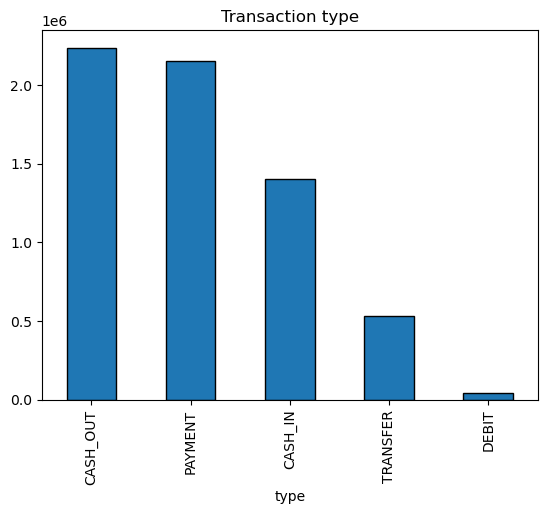

In [8]:
#plot transaction type 
df_type.plot.bar(title= "Transaction type",edgecolor="black")

In [9]:
#Find transactions which were flagged as Fraud using value_counts

df_ffraud = df.value_counts("isFlaggedFraud")
df_ffraud.to_frame() #add to dataframe

,count
isFlaggedFraud,
0,6362604
1,16


In [10]:
# Find transtaction which were actually Fraud using Value_counts

df_fraud = df.value_counts("isFraud")
df_fraud.to_frame()

,count
isFraud,
0,6354407
1,8213


<Axes: title={'center': 'Fraud VS.Not_Fraud'}, xlabel='isFraud'>

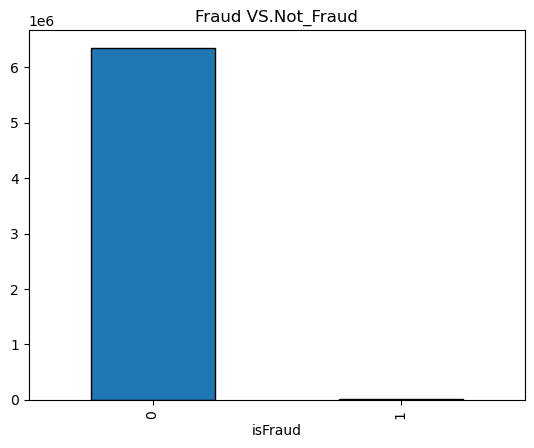

In [28]:
df_fraud.plot.bar(title= "Fraud VS.Not_Fraud",edgecolor="black")

In [45]:
#Turn isFraud and into boolean index 1 for isfraud 0 for is not fraud 
Fraud_df= df[df["isFraud"] == 1]
NotFraud_df= df[df["isFraud"] == 0]


In [47]:
#show trancation that were fraud 
Fraud_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


<Axes: xlabel='amount', ylabel='Count'>

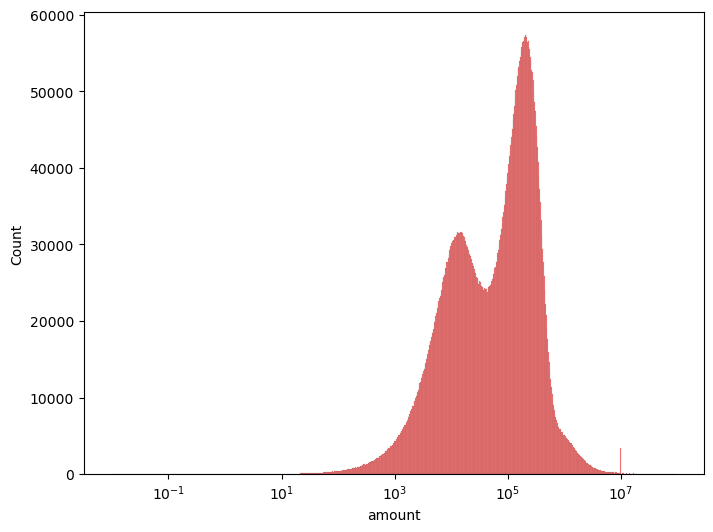

In [48]:

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="amount", color="red", kde=True, log_scale=True)
#sns.histplot(data=df,x="amount",color="red",kde=True,log_scale=True,edgecolor="black",linewidth=1.5,alpha=0.7)

comment about dimodudal distrubution


<Axes: >

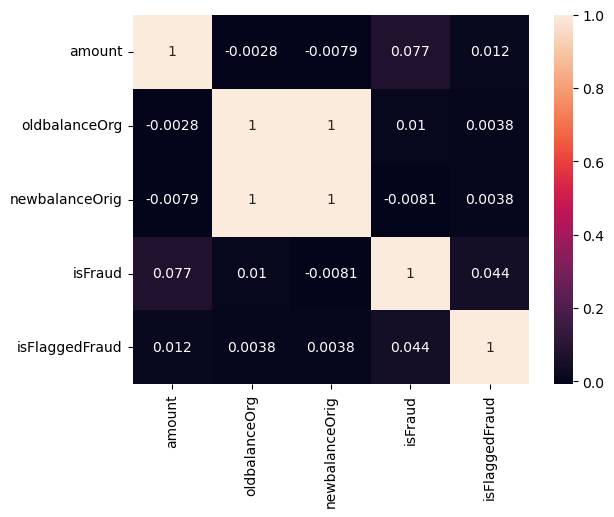

In [64]:

# Create new DataFrame without string variables 


heat_dict = pd.DataFrame({"amount":df["amount"],
                "oldbalanceOrg":df["oldbalanceOrg"],
                "newbalanceOrig":df["newbalanceOrig"],
                "isFraud":df["isFraud"],
                "isFlaggedFraud":df["isFlaggedFraud"]

    
}) 
#use heat_dict to create heatmap
sns.heatmap(heat_dict.corr(), annot=True)

<Axes: title={'center': 'Fraudulent transaction by type'}, xlabel='type'>

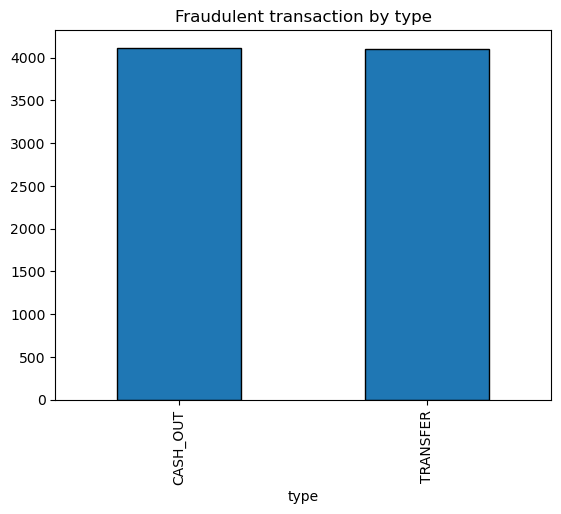

In [55]:
# distrubtion of actual Fraudulent transaction
Fraud_df["type"].value_counts().plot.bar( title = "Fraudulent transaction by type",edgecolor="black")

Fraudulent transaction 

# Bivariate Analysis

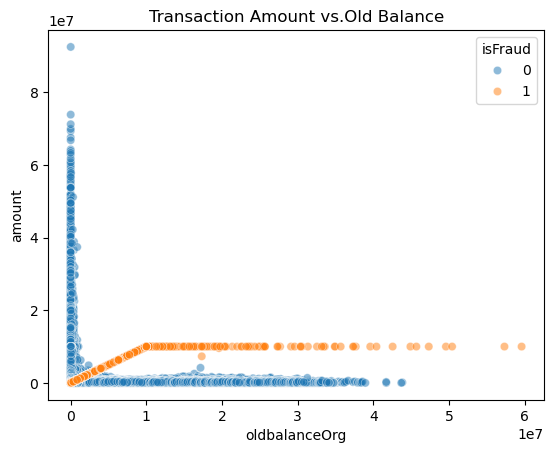

In [62]:
sns.scatterplot(data=df, x="oldbalanceOrg", y="amount", hue="isFraud", alpha=0.5)
plt.title("Transaction Amount vs.Old Balance")
plt.show()


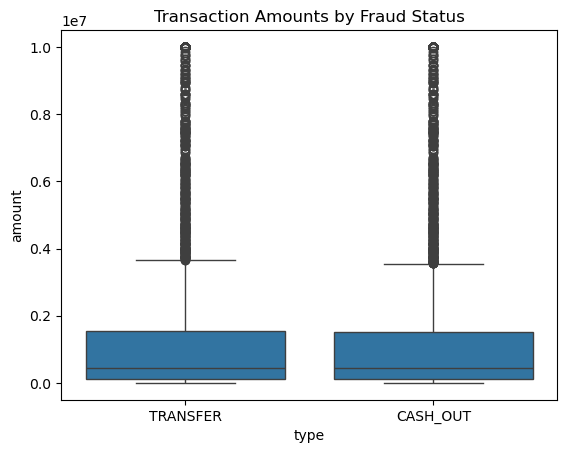

In [61]:
#Boxplot
sns.boxplot(x="type",y="amount",data=Fraud_df)
plt.title("Transaction Amounts by Fraud Status")
plt.show()